### Do it! 실습 | 연령대 및 성별 월급 차이 분석하기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# 데이터 불러오기
raw_welfare = pd.read_spss('/Users/heohyeonjun/Desktop/We_IT_5th/weit/Data/Koweps_hpwc14_2019_beta2.sav')

# 복사본 만들기
welfare = raw_welfare.copy()

In [6]:
welfare = welfare.rename(
    columns = {
        'h14_g3' : 'sex', # 성별
        'h14_g4' : 'birth', # 태어난 연도
        'h14_g10' : 'merrage_type', # 혼인 상태
        'h14_g11' : 'religion', # 종교
        'p1402_8aq1' : 'income', # 월급
        'h14_eco9' : 'code_job', # 직업 코드
        'h14_reg7' : 'code_region' # 지역 코드
    }
)

In [9]:
# 이상치 결측 처리
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])

# 결측치 확인
welfare['sex'].isna().sum()

0

In [10]:
# 성별 항목 이름 부여
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')

# 빈도 구하기
welfare['sex'].value_counts()

female    7913
male      6505
Name: sex, dtype: int64

In [11]:
# 이상치 결측 처리
welfare['income'] = np.where(welfare['income'] == 9999, np.nan, welfare['income'])

# 결측치 확인
welfare['income'].isna().sum()

9884

In [12]:
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1) # 나이 변수 만들기
welfare['age'].describe()

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

In [13]:
# 연령대 변수 만들기
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young',
                                np.where(welfare['age'] <= 59,'middle',
                                                                'old')))

# 빈도 구하기
welfare['ageg'].value_counts()

old       5955
middle    4963
young     3500
Name: ageg, dtype: int64

## -------------------------------- 여기부터 --------------------------------

In [14]:
# 연령대 및 성별 평균표 만들기
# 1. income 결측치 제거
# 2. ageg 및 sex별 분리
# 3. income 평균 구하기
sex_income = \
    welfare.dropna(subset=['income']) \
        .groupby(['ageg', 'sex'], as_index = False) \
        .agg(mean_income = ('income', 'mean'))

In [15]:
sex_income

,ageg,sex,mean_income
0,middle,female,230.481735
1,middle,male,409.541228
2,old,female,90.228896
3,old,male,204.570231
4,young,female,189.822222
5,young,male,204.909548


<AxesSubplot:xlabel='ageg', ylabel='mean_income'>

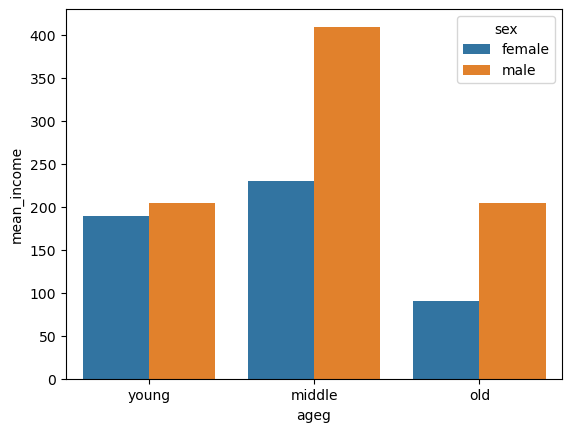

In [16]:
# 막대 그래프 만들기
sns.barplot(data=sex_income, x='ageg', y='mean_income', hue='sex', order=['young', 'middle', 'old'])

### Do it! 실습 | 나이 및 성별 월급 차이 분석하기

In [18]:
# 나이 및 성별 월급 분석표 만들기
# 1. income 결측치 제거
# 2. age 및 sex별 분리
# 3. income 평균 구하기
sex_age = welfare.dropna(subset=['income']).groupby(['age', 'sex'], as_index=False).agg(mean_income = ('income', 'mean')) 
sex_age.head()

,age,sex,mean_income
0,19.0,male,162.000000
1,20.0,female,87.666667
2,20.0,male,155.000000
3,21.0,female,124.000000
4,21.0,male,186.000000


<AxesSubplot:xlabel='age', ylabel='mean_income'>

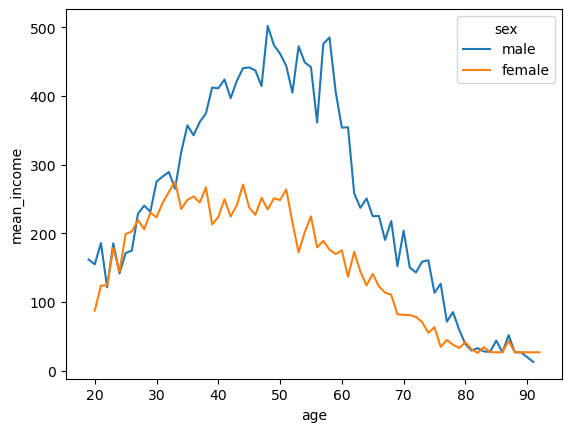

In [22]:
# 선그래프 만들기
sns.lineplot(data=sex_age, x='age', y='mean_income', hue='sex')